# Brief Analyse Of The Problem Statement

Since we have the data prepared, clean and analyse the data

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as pe
import seaborn as sb
import os
import re
import numpy as np
import squarify
import json
from wordcloud import WordCloud, STOPWORDS
import ast

import warnings

warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [77]:
#lets import the new data that we prepared 

In [78]:
data = pd.read_csv("crypto_supermind.csv")

In [79]:
data.sample(2)

,id,text,image,root_ref,reply_ref,sender.ref,sender.avatar_url,sender.name,sender.username,sender.is_bot,...,mentions_list,hashtag_list,external_links_list,for_ref_id,for_from_channel,for_from_user,for_from_channel.ref_id,for_from_channel.user_name,for_from_channel.title,for_from_channel.chat_avatar_url
22676,345933,So you think the NYAG case against Tether wasn...,NaN,NaN,NaN,1.465114e+09,NaN,Ruby,OGohmie,False,...,[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
12044,367357,"Singapore, Dubai, South East Asia",NaN,NaN,NaN,3.755427e+08,telegram/user_avatar/640x640/375542731.png,"ivangbi | ngmi (🦞,⚙️)",ivangbi,False,...,[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34139 entries, 0 to 34138
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                34139 non-null  int64  
 1   text                              33125 non-null  object 
 2   image                             911 non-null    object 
 3   root_ref                          7486 non-null   float64
 4   reply_ref                         15488 non-null  float64
 5   sender.ref                        34139 non-null  float64
 6   sender.avatar_url                 27669 non-null  object 
 7   sender.name                       34139 non-null  object 
 8   sender.username                   33374 non-null  object 
 9   sender.is_bot                     34139 non-null  bool   
 10  sender                            0 non-null      float64
 11  ref_id                            34139 non-null  int64  
 12  date

In [81]:
data['sender.ref'] = data['sender.ref'].astype(int)

### Total number of messages sent to the channel 

In [82]:
#total-empty will give us the actual data

In [83]:
total_messages = len(data['sender.ref']) - data['sender.ref'].isnull().sum()

In [84]:
print("Total Number of messages sent:",total_messages)

Total Number of messages sent: 34139


### Total Number of Unique Sender

In [85]:
print("Total Number of Unique Sender:",data['sender.name'].nunique())

Total Number of Unique Sender: 99


### Total Number of Text or Image Data sent

In [86]:
total_text = len(data['text']) - data['text'].isnull().sum()
print("Total Text Messages sent:",total_text)

Total Text Messages sent: 33125


In [87]:
nuniq_text = data['text'].nunique()
print("Unique Messages sent:",nuniq_text)

Unique Messages sent: 32535


In [88]:
print("Repeated Message:",total_text-nuniq_text)

Repeated Message: 590


In [89]:
total_images = len(data['image']) - data['image'].isnull().sum()

In [90]:
print("Total Images sent:",total_images)

Total Images sent: 911


## Visualize the message data

(0.0, 100.0, 0.0, 100.0)

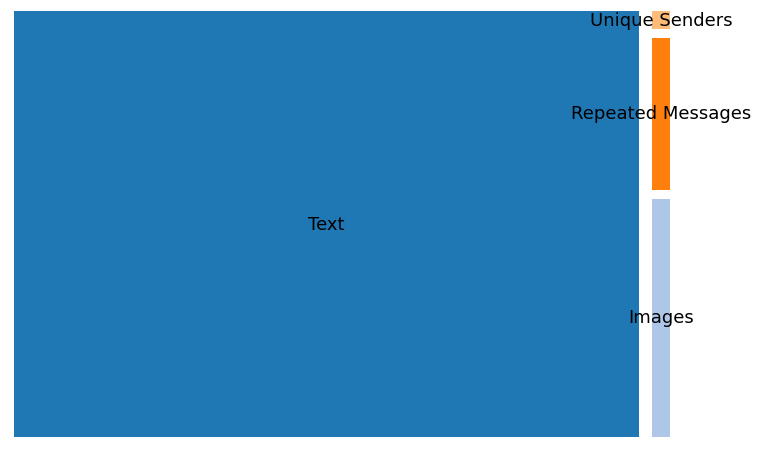

In [91]:
plt.figure(figsize=(12,8))
value_data = [32535,911,590,99]
data_names = ["Text","Images","Repeated Messages","Unique Senders"]
  
squarify.plot(value_data,
              label=data_names,
              pad=2,
              text_kwargs={'fontsize': 18},
              color=sb.color_palette("tab20", len(value_data)))
plt.axis("off")

### Total Message sent per day

In [92]:
data['date']

0        1.661247e+09
1        1.661246e+09
2        1.661246e+09
3        1.661246e+09
4        1.661246e+09
             ...     
34134    1.660977e+09
34135    1.660977e+09
34136    1.660977e+09
34137    1.660977e+09
34138    1.660977e+09
Name: date, Length: 34139, dtype: float64

Ask in what format is date stored

In [93]:
#date based questions update it after clarification

## Wordcloud

In [94]:
#lowering
def to_lower(text_data):
    if isinstance(text_data,float):
        return ""
    else:
        return text_data.lower()

In [95]:
#remove url
#some text have url so, lets remove it
def remove_url(text_data):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text_data)

In [96]:
data['text'] = data['text'].apply(to_lower)

In [97]:
data['text'] = data['text'].apply(remove_url)

In [98]:
data['text']

0        are there any wallet protection layer or tools...
1        you have to be careful, a lot of players that ...
2        hentzer hates crypto and sometimes even bans c...
3        i currently use hentzer, but don't want to pay...
4                                           njalla as well
                               ...                        
34134                         degenscore with extra steps?
34135    how can you tokenise expertise before it's ver...
34136                           that cover image is a vibe
34137                              so pure vanity utility?
34138                  it’s only tokenised after the fact?
Name: text, Length: 34139, dtype: object

In [99]:
def generate_wordcloud(category):
    plt.figure(figsize=(14,14))
    wc = WordCloud(max_words=1000, 
                   min_font_size=10,
                   height=800,
                   width=1600,
                   background_color='black',
                   contour_color='black',
                   colormap='plasma',
                   repeat=False,
                   stopwords=STOPWORDS).generate(' '.join(data[category]))

    plt.title("Keywords", size=15, weight='bold')
    plt.imshow(wc, interpolation= "bilinear")
    plt.axis('off')

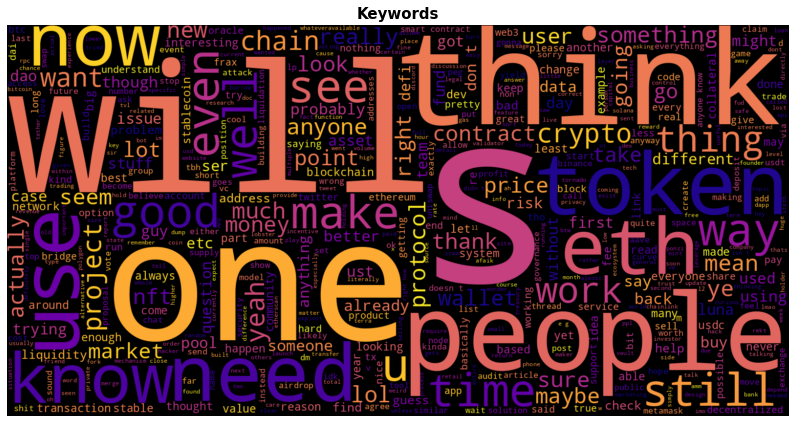

In [100]:
generate_wordcloud("text")

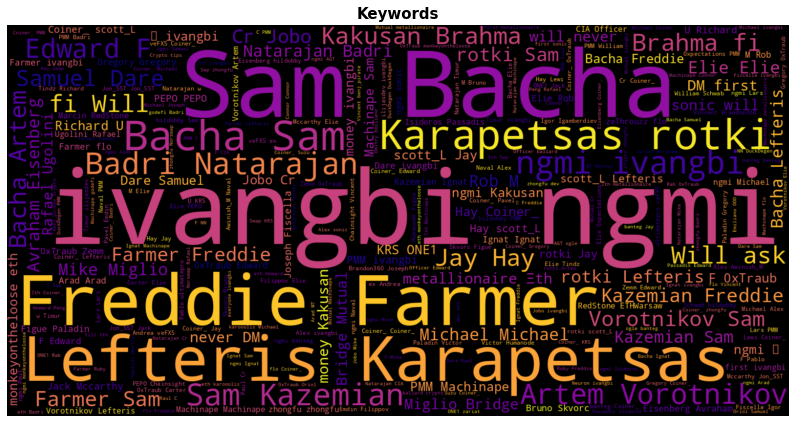

In [101]:
generate_wordcloud("sender.name")

## Most Active Folks

In [102]:
group_common = data.groupby("sender.name")[['text','image']].count()

In [103]:
top10_text = group_common.sort_values(['text'])[::-1].iloc[:10]

In [104]:
top10_text

,text,image
sender.name,,
"ivangbi | ngmi (🦞,⚙️)",3665,94
Sam Bacha,2975,79
Freddie | Farmer,1530,35
Coiner_,1451,37
Lefteris Karapetsas | rotki,1196,26
"Sam Kazemian (¤, ¤)",935,21
Badri Natarajan,935,19
Artem Vorotnikov 🇷🇺☦️,935,24
Elie,850,25


In [105]:
top10_images = group_common.sort_values(['image'])[::-1].iloc[:10]

In [106]:
top10_images

,text,image
sender.name,,
"ivangbi | ngmi (🦞,⚙️)",3665,94
Sam Bacha,2975,79
Coiner_,1451,37
Freddie | Farmer,1530,35
PMM ♟,769,32
Lefteris Karapetsas | rotki,1196,26
Elie,850,25
Machinape,850,25
Artem Vorotnikov 🇷🇺☦️,935,24


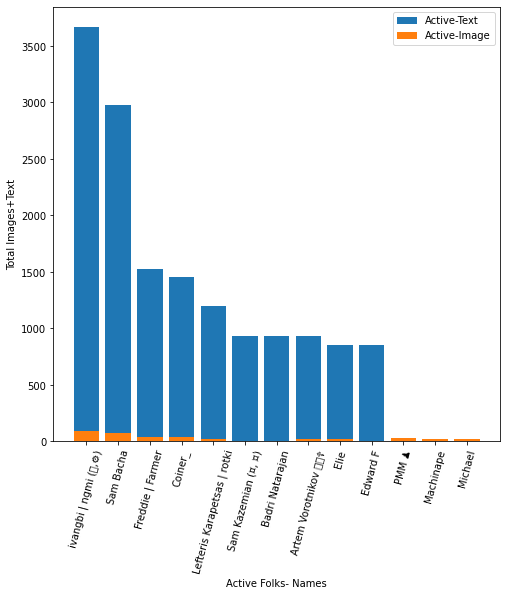

In [107]:
plt.figure(figsize=(8,8))
plt.bar(top10_text.index,top10_text.text,label="Active-Text")
plt.bar(top10_images.index,top10_images.image,label="Active-Image")
plt.xlabel("Active Folks- Names")
plt.ylabel("Total Images+Text")
plt.xticks(rotation=75)
plt.legend()

### Least Active Folks

In [68]:
least_group = data.groupby("sender.name")[['text','image']].count()

In [69]:
bottom10_text = least_group.sort_values(['text']).iloc[:10]

In [108]:
bottom10_text

,text,image
sender.name,,
(◕︣ ω ◕᷅) ✌️,85,1
Victor | Humanode,85,4
Emiliano - OOO till 5th Sep,85,0
Tindz,85,1
Swap,85,2
Howard Peng,85,1
Suzu,85,2
Igor Igamberdiev,85,2
Ruby,85,2


In [110]:
bottom10_images = least_group.sort_values(['image']).iloc[:10]

In [111]:
bottom10_images

,text,image
sender.name,,
Emiliano - OOO till 5th Sep,85,0
Brandon360,85,0
(◕︣ ω ◕᷅) ✌️,85,1
Norswap,85,1
K,85,1
Pablo,85,1
Paul Cr,85,1
Isidoros Passadis,170,1
Raul C,85,1


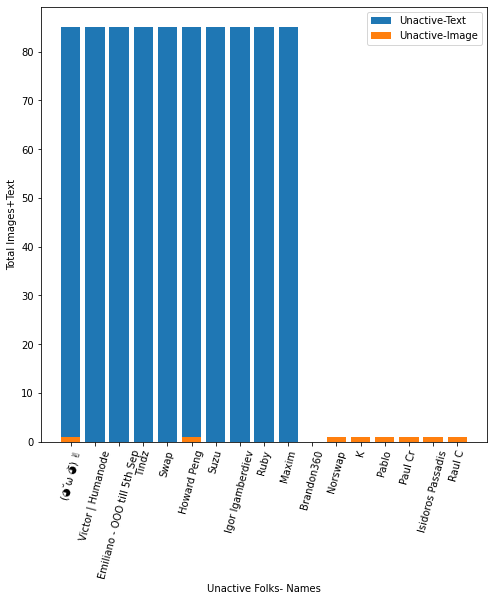

In [112]:
plt.figure(figsize=(8,8))
plt.bar(bottom10_text.index,bottom10_text.text,label="Unactive-Text")
plt.bar(bottom10_images.index,bottom10_images.image,label="Unactive-Image")
plt.xlabel("Unactive Folks- Names")
plt.ylabel("Total Images+Text")
plt.xticks(rotation=75)
plt.legend()

### Bot Analysis

In [113]:
data[data['sender.is_bot'] == True]

,id,text,image,root_ref,reply_ref,sender.ref,sender.avatar_url,sender.name,sender.username,sender.is_bot,...,mentions_list,hashtag_list,external_links_list,for_ref_id,for_from_channel,for_from_user,for_from_channel.ref_id,for_from_channel.user_name,for_from_channel.title,for_from_channel.chat_avatar_url


In [114]:
#There is no Bot messages, so lets drop the column
data.drop('sender.is_bot',axis=1,inplace=True)

## Engagement

In [115]:
engagement_col = ["reaction_list","mentions_list","hashtag_list","external_links_list"]

In [116]:
engagement_data = data[engagement_col]

In [117]:
engagement_data

,reaction_list,mentions_list,hashtag_list,external_links_list
0,[],[],[],[]
1,[],[],[],[]
2,"[{'emoji_unicode': '👍', 'count': 3}]",[],[],[]
3,[],[],[],[]
4,[],[],[],[]
...,...,...,...,...
34134,[],[],[],[]
34135,"[{'emoji_unicode': '😢', 'count': 1}]",[],[],[]
34136,[],[],[],[]
34137,[],[],[],[]


#### Ok, lets analyze this for a second. What do you this engagement is reacted on? It can be image or text. So lets add more columns to this dataset.
- sender.name
- id
- sender.ref

In [118]:
more_col = engagement_col + ['sender.name','id','sender.ref','text','image']
engagement_data = data[more_col]

In [119]:
engagement_data.head(5)

,reaction_list,mentions_list,hashtag_list,external_links_list,sender.name,id,sender.ref,text,image
0,[],[],[],[],Michael,375810,405234186,are there any wallet protection layer or tools...,NaN
1,[],[],[],[],Alex,375809,231650994,"you have to be careful, a lot of players that ...",NaN
2,"[{'emoji_unicode': '👍', 'count': 3}]",[],[],[],"ivangbi | ngmi (🦞,⚙️)",375808,375542731,hentzer hates crypto and sometimes even bans c...,NaN
3,[],[],[],[],Naval,375807,5107801974,"i currently use hentzer, but don't want to pay...",NaN
4,[],[],[],[],Alex,375806,231650994,njalla as well,NaN


#### before we proceed, its better to clean the list of the engagement data

In [120]:
emojis = []
likes = []
for reactions in engagement_data['reaction_list']:
    #reaction list is a string
    #within string we have list
    #and within list we have dictionary and tuple
    #lets decode it
    if len(reactions)>3:
        #why 3?
        #because [] calulates to 2, so we need something more than 2
        get_dict = ast.literal_eval(reactions[1:-1])
        if isinstance(get_dict,tuple):   
            for from_tuple in get_dict:
                emojis.append(from_tuple['emoji_unicode'])
                likes.append(from_tuple['count'])
                break   #break because we need to match the total length of dataset
        else:
            emojis.append(get_dict['emoji_unicode'])
            likes.append(get_dict['count'])
    else:
        emojis.append("")
        likes.append("")

In [121]:
engagement_data['emoji'] = emojis
engagement_data['like_count'] = likes

In [122]:
engagement_data.drop('reaction_list',axis=1,inplace=True)

## Lets see on what type of text did People react to

### 👍 reaction text

In [123]:
ok_mess = engagement_data[engagement_data['emoji']=="👍"][['text','image','sender.name','emoji']]

In [124]:
ok_mess

,text,image,sender.name,emoji
2,hentzer hates crypto and sometimes even bans c...,NaN,"ivangbi | ngmi (🦞,⚙️)",👍
5,at akash network,NaN,Awinish_M,👍
8,"lobsters, we kinda put that issue to bed back ...",NaN,"ivangbi | ngmi (🦞,⚙️)",👍
10,the dune dashboard where the data comes from,NaN,Lars,👍
22,the day microsoft bought github it was time to...,NaN,Jay Hay,👍
...,...,...,...,...
34101,successful traders on most platforms get a cut...,NaN,Rafael Ugolini,👍
34102,"yea, harmony always late and wrong to everythi...",NaN,Rafael Ugolini,👍
34104,the foundation is falling apart from the inside,NaN,flo,👍
34110,"if i may share (as we are on a topic), our fir...",NaN,Adi,👍


In [125]:
engagement_data['emoji'].unique()

array(['', '👍', '🔥', '🍌', '❤', '👎', '😢', '🥱', '👏', '💩', '😁', '🤣', '💯',
       '🙏', '🌭', '🤔'], dtype=object)

### ok enough with this. Lets Visualize it

In [126]:
def get_length(emoji_reaction):
    return len(engagement_data[engagement_data['emoji']==emoji_reaction])

In [127]:
mapping = {}
for emoji in engagement_data['emoji'].unique():
    if emoji == "":
        pass
    else:
        mapping[emoji] = get_length(emoji)

Text(0.5, 1.0, 'Emoji Reacted')

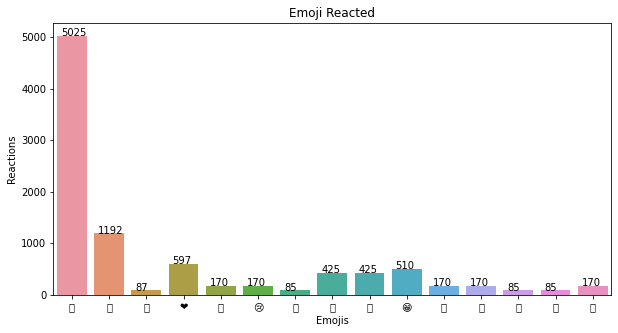

In [128]:
plt.figure(figsize=(10,5))
sb.barplot(list(mapping.keys()),list(mapping.values()))
xlocs=[i for i in range(0,15)]
for i, v in enumerate(list(mapping.values())):
    plt.text(xlocs[i]-0.3, v + 0.04, str(v))
plt.xlabel("Emojis")
plt.ylabel("Reactions")
plt.title("Emoji Reacted")

### When people approved 👍 and disapproved 👎

Text(0.5, 0, 'Reaction')

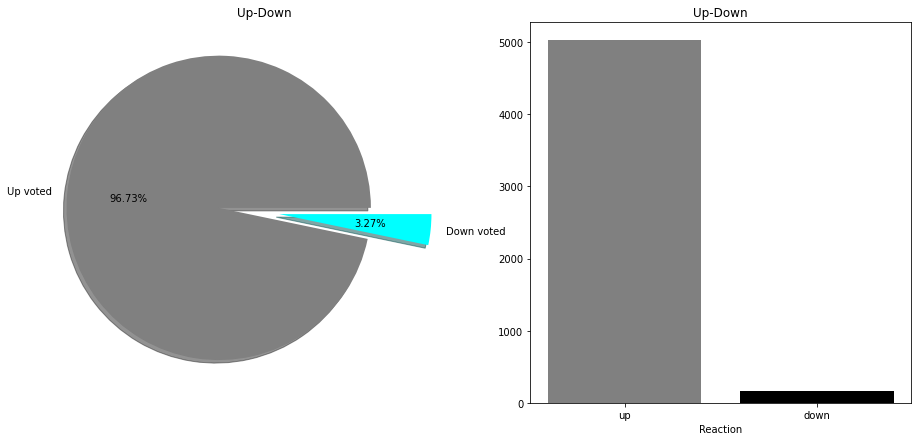

In [135]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.pie([mapping['👍'],mapping['👎']],
        labels=["Up voted","Down voted"],
        explode=[0.3,0.1],
        colors=["grey","aqua"]
        ,shadow=True,
        autopct="%.2f%%")
plt.title("Up-Down")
plt.subplot(1,2,2)
plt.bar(['up','down'],[mapping['👍'],mapping['👎']],color=["grey","black"])
plt.title("Up-Down")
plt.xlabel("Reaction")

### Mention

In [153]:
mentions = []
for mention in engagement_data['mentions_list']:
    if len(mention)>3:
        make_dict = ast.literal_eval(mention[1:-1])
        if isinstance(make_dict,tuple):
            for first in make_dict:
                mentions.append(first['user_name'])
                break
        else:
            mentions.append(make_dict['user_name'])
    else:
        mentions.append("")

In [155]:
engagement_data['mentions_list'] = mentions

In [160]:
engagement_data.groupby("mentions_list")[['text','image']].count()

,text,image
mentions_list,,
,33714,905
@ivangbi,85,1
@ivangbi,85,1
@kakusaan,85,0
@storm,85,2
@timbeiko,85,2


In [161]:
#ivangbi, kakusaan and strom have been mentioned the most

### Thats it for the assessment, I want to gain more real-time knowledge by working with the team. So I hope I get opportunity at SuperMind. Do let me know if I missed anything... Waiting for the feedback.

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fstatic.vecteezy.com%2Fsystem%2Fresources%2Fpreviews%2F000%2F395%2F677%2Foriginal%2Fthank-you-neon-sign-vector.jpg&f=1&nofb=1">